In [6]:
import os
import sys

sys.path.append("..")

import warnings
warnings.filterwarnings("ignore")

import lpips
import pytorch_lightning as pl

from autoencoder import CIFAR10Autoencoder, ANNAutoencoder
from utils import visualize_cifar_reconstructions
from dataloader import load_cifar, load_celeba, load_fashion_mnist, load_mnist

#### Training CIFAR10 Vanilla Autoencoder

In [3]:
loss_fn = lpips.LPIPS(net='vgg')

# from torchmetrics.image.lpip import LearnedPerceptualImagePatchSimilarity
# loss_fn = LearnedPerceptualImagePatchSimilarity(net_type='vgg', normalize=True)

train_dataloader, valid_dataloader, test_dataloader = load_cifar(
    root="~/scratch/datasets/CIFAR10/", batch_size=128
)

model = CIFAR10Autoencoder(perceptual_loss=True, loss=loss_fn)
trainer = pl.Trainer(max_epochs=100, accelerator="mps", default_root_dir="..")
trainer.fit(model, train_dataloader, valid_dataloader)

Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /Users/swainsubrat/anaconda3/envs/py38/lib/python3.8/site-packages/lpips/weights/v0.1/vgg.pth
Files already downloaded and verified
Files already downloaded and verified


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name    | Type       | Params
---------------------------------------
0 | encoder | Sequential | 364 K 
1 | decoder | Sequential | 365 K 
2 | loss    | LPIPS      | 14.7 M
---------------------------------------
731 K     Trainable params
14.7 M    Non-trainable params
15.4 M    Total params
61.787    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

#### Testing CIFAR10 Vanilla Autoencoder

Files already downloaded and verified
Files already downloaded and verified


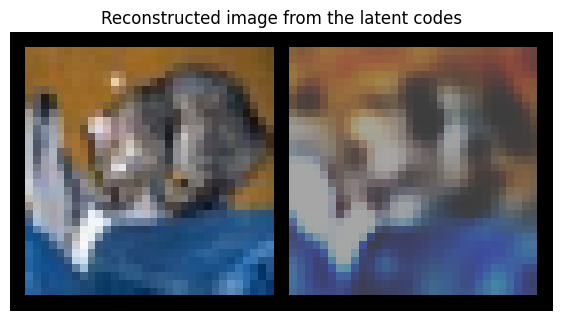

In [4]:
train_dataloader, valid_dataloader, test_dataloader = load_cifar(
    root="~/scratch/datasets/CIFAR10/", batch_size=1
)
input_imgs, _ = next(iter(test_dataloader))
model = CIFAR10Autoencoder.load_from_checkpoint("../lightning_logs/version_36/checkpoints/checkpoint.ckpt")
model.eval()
reconst_imgs, _ = model(input_imgs)

visualize_cifar_reconstructions(input_imgs, reconst_imgs, file_name="cifar10_ae_mse")

In [5]:
loss_fn = lpips.LPIPS(net='vgg')
loss_fn(input_imgs, reconst_imgs)

Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /Users/swainsubrat/anaconda3/envs/py38/lib/python3.8/site-packages/lpips/weights/v0.1/vgg.pth


tensor([[[[0.3041]]]], grad_fn=<AddBackward0>)

Files already downloaded and verified
Files already downloaded and verified


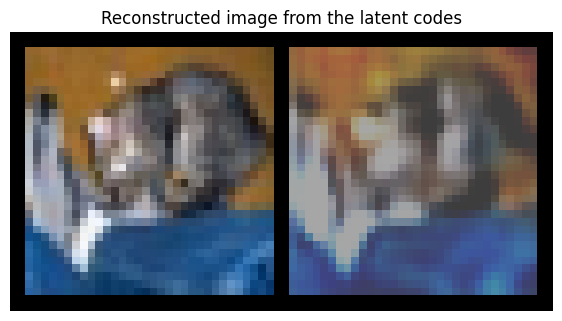

In [6]:
train_dataloader, valid_dataloader, test_dataloader = load_cifar(
    root="~/scratch/datasets/CIFAR10/", batch_size=1
)
input_imgs, _ = next(iter(test_dataloader))
model = CIFAR10Autoencoder.load_from_checkpoint("../lightning_logs/cifar10_ae_mse/checkpoints/epoch=199-step=35000.ckpt")
model.eval()
reconst_imgs, _ = model(input_imgs)

visualize_cifar_reconstructions(input_imgs, reconst_imgs, file_name="cifar10_ae_mse_old")

In [8]:
loss_fn = lpips.LPIPS(net='vgg')
loss_fn(input_imgs, reconst_imgs)

Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /Users/swainsubrat/anaconda3/envs/py38/lib/python3.8/site-packages/lpips/weights/v0.1/vgg.pth


tensor([[[[0.2107]]]], grad_fn=<AddBackward0>)

In [21]:
import torch
import torchvision
import matplotlib.pyplot as plt

train_dataloader, valid_dataloader, test_dataloader = load_mnist(
    root="~/scratch/datasets/MNIST/", batch_size=128
)
model = ANNAutoencoder()
trainer = pl.Trainer(max_epochs=100, accelerator="mps", default_root_dir="..")
trainer.fit(model, train_dataloader, valid_dataloader)    

# model = ANNAutoencoder.load_from_checkpoint("../lightning_logs/mnist_ae_mse/checkpoints/epoch=9-step=9370.ckpt")
model.eval()

x, _ = next(iter(test_dataloader))
x_hat, _ = model(x)

def plot_images(images):
    plt.figure(figsize=(20, 6))
    images = torch.Tensor(images).reshape(-1, 1, 28, 28)
    grid = torchvision.utils.make_grid(images, nrow=10, normalize=False, range=(-1,1))
    grid = grid.permute(1, 2, 0)
    plt.imshow(grid)
    plt.axis('off')
    plt.show()

images = torch.cat((x, x_hat), 0)
plot_images(images=images)

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name    | Type       | Params
---------------------------------------
0 | encoder | Sequential | 571 K 
1 | decoder | Sequential | 571 K 
---------------------------------------
1.1 M     Trainable params
0         Non-trainable params
1.1 M     Total params
4.573     Total estimated model params size (MB)


Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

ValueError: `self.log(valid_loss, tensor([[0.2442, 0.2572, 0.2453,  ..., 0.2527, 0.2507, 0.2404],
        [0.2443, 0.2571, 0.2452,  ..., 0.2523, 0.2504, 0.2404],
        [0.2441, 0.2573, 0.2451,  ..., 0.2525, 0.2510, 0.2405],
        ...,
        [0.2447, 0.2570, 0.2452,  ..., 0.2524, 0.2505, 0.2400],
        [0.2442, 0.2572, 0.2453,  ..., 0.2528, 0.2505, 0.2399],
        [0.2447, 0.2575, 0.2450,  ..., 0.2526, 0.2505, 0.2403]]))` was called, but the tensor must have a single element. You can try doing `self.log(valid_loss, tensor([[0.2442, 0.2572, 0.2453,  ..., 0.2527, 0.2507, 0.2404],
        [0.2443, 0.2571, 0.2452,  ..., 0.2523, 0.2504, 0.2404],
        [0.2441, 0.2573, 0.2451,  ..., 0.2525, 0.2510, 0.2405],
        ...,
        [0.2447, 0.2570, 0.2452,  ..., 0.2524, 0.2505, 0.2400],
        [0.2442, 0.2572, 0.2453,  ..., 0.2528, 0.2505, 0.2399],
        [0.2447, 0.2575, 0.2450,  ..., 0.2526, 0.2505, 0.2403]]).mean())`

: 

In [46]:
import torch
import torch.nn.functional as F

from torch import nn

class MaskedLinear(nn.Linear):
    def __init__(self, *args, mask, **kwargs):
        super().__init__(*args, **kwargs)
        self.mask = mask
        self.sigmoid = nn.Sigmoid()
        self.b = torch.zeros(self.bias.shape)

    def forward(self, input):
        out = F.linear(input, self.mask, self.b)
        out = self.sigmoid(out)

        return out
mask = torch.block_diag(*[torch.ones(1, 2),] * 2)
layer = MaskedLinear(4, 2, mask=mask)

In [47]:
layer(torch.Tensor([1, 1, 0, 0]))

tensor([2., 0.])